<a href="https://colab.research.google.com/github/miniking098/Deep-learning-python-notebooks/blob/master/breast_cancer_detection_%20using_mp_neuron_and%20_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets as sk
import numpy as np


In [0]:
breast_cancer=sk.load_breast_cancer()

In [0]:
x=breast_cancer.data
y=breast_cancer.target

In [0]:
print(x,y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [0]:
print(x.shape,y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

In [0]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [0]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data['class']=breast_cancer.target

In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [0]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [0]:
data.groupby('class').describe()

mean radius                       ... worst fractal dimension                  
            count       mean       std  ...                     50%       75%     max
class                                   ...                                          
0           212.0  17.462830  3.203971  ...                 0.08760  0.102625  0.2075
1           357.0  12.146524  1.780512  ...                 0.07712  0.085410  0.1486

[2 rows x 240 columns]

#Train_test_split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x=data.drop('class',axis=1)
y=data['class']

In [0]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#splitting the data into two parts as training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y) 

In [0]:
print(x.shape,x_test.shape,x_train.shape)

(569, 30) (143, 30) (426, 30)


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [0]:
print(x.shape,x_test.shape,x_train.shape)

(569, 30) (143, 30) (426, 30)


In [0]:
print(y.mean(),y_test.mean(),y_train.mean())

0.6274165202108963 0.6573426573426573 0.6173708920187794


In [0]:
#in order to provide with a even data split we use the keyword stratify to even out the split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

In [0]:
#wverytime the above cell is runned each time the split is different. But for any machine learning application the split must remain constant no matter how many time
#the split is done. so we use a random number to fix the split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=6)

In [0]:
print(x_train.mean(),x_test.mean(),x.mean())

mean radius                 14.130707
mean texture                19.308809
mean perimeter              92.008418
mean area                  654.842383
mean smoothness              0.096218
mean compactness             0.104710
mean concavity               0.089293
mean concave points          0.049061
mean symmetry                0.181344
mean fractal dimension       0.062873
radius error                 0.403351
texture error                1.219602
perimeter error              2.856970
area error                  39.878807
smoothness error             0.007037
compactness error            0.025810
concavity error              0.032262
concave points error         0.011858
symmetry error               0.020620
fractal dimension error      0.003852
worst radius                16.283172
worst texture               25.702148
worst perimeter            107.394961
worst area                 881.800195
worst smoothness             0.132285
worst compactness            0.256032
worst concav

In [0]:
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,0.3971,0.8282,3.088,40.73,0.006090,0.025690,0.02713,0.013450,0.01594,0.002658,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.35080,0.19390,0.2928,0.07867
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.92,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938
234,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,0.2152,0.8301,1.215,12.64,0.011640,0.010400,0.01186,0.009623,0.02383,0.003540,10.51,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,0.2351,2.0110,1.660,14.20,0.010520,0.017550,0.01714,0.009333,0.02279,0.004237,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211
267,13.590,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,0.3380,1.9160,2.591,26.76,0.005436,0.024060,0.03099,0.009919,0.02030,0.003009,14.80,30.04,97.66,661.5,0.1005,0.17300,0.14530,0.06189,0.2446,0.07024


#Binarization of input

In [0]:
import matplotlib.pyplot as plt

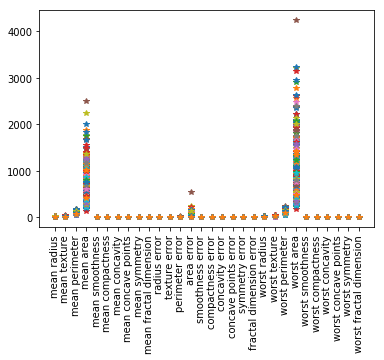

In [0]:
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
x_binarised_train_3=x_train['mean area'].map(lambda x: 0 if x<1000 else 1)

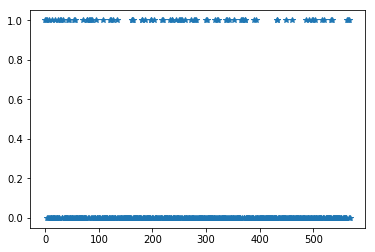

In [0]:
plt.plot(x_binarised_train_3,'*')
plt.show()

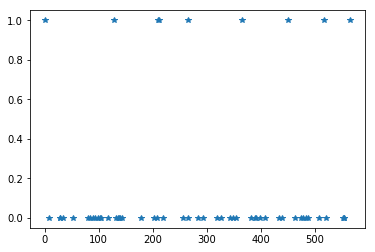

In [0]:
x_test_3=x_test['mean area'].map(lambda x: 0 if x<1000 else 1)
plt.plot(x_test_3,'*')
plt.show()

In [0]:
q=pd.DataFrame(x_test_3)
q.head()

,mean area
139,0
319,0
555,0
488,0
439,0


In [0]:
import pandas as pd

In [0]:
#when you look at the groupby cell then the value which is 0 has larger value than values with 1. so the labels are 1,0 not 0,1.
x_binarised_train=x_train.apply(pd.cut, bins=2, labels=[1,0])

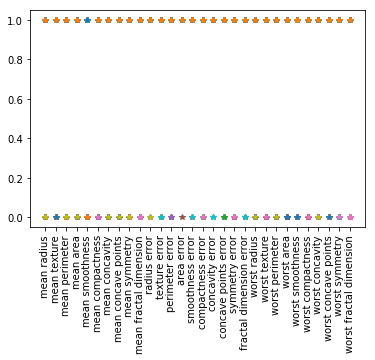

In [0]:
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
x_binarised_test=x_test.apply(pd.cut,bins=2, labels=[1,0])

In [0]:
type(x_binarised_train)

pandas.core.frame.DataFrame

In [0]:
x_binarised_train=x_binarised_train.values
x_binarised_test=x_binarised_test.values

#MP neuron model

In [0]:
from random import randint

In [0]:
#in this model recipie we are using only one row at a time to check whether the prediction is correct or not
b=3   #the predefined threshold
i=randint(0,x_binarised_train.shape[0])   #the row to be checked
print("this is ",i,"th row.")
if (np.sum(x_binarised_train[i:])>b):               # checking using the mp neuron model
  print("this is malignant")
else:
  print("this is begnin")
if y_train[i]==1:
  print("ground truth is malignant")
else:  print("ground truth is begnin")

this is  262 th row.
this is malignant
ground truth is begnin


In [0]:
#on thing to keep in mind is that while doing the binarisation keep track of which value is to be labled 0 or 1(higher or lower one)
b=3 
y_pred_train=[]
accurate_rows=0
for X,Y in zip(x_binarised_train,y_train):
  y_pred=np.sum(X)>=b
  y_pred_train.append(y_pred)
  accurate_rows+=(Y==y_pred)
print(accurate_rows,accurate_rows/x_binarised_train.shape[0])

321 0.626953125


In [0]:
x_binarised_train.shape[1]

30

In [0]:
#searching for the sutable value of b for the model to predict the correct ouput
max_b=0
max_accuracy=0
for b in range(x_binarised_train.shape[1]+1):
  y_pred_train=[]
  accurate_rows=0
  for X,Y in zip(x_binarised_train,y_train):
    y_pred=np.sum(X)>=b
    y_pred_train.append(y_pred)
    accurate_rows+=(Y==y_pred)
  print(b," : ",accurate_rows,accurate_rows/x_binarised_train.shape[0])
  if accurate_rows/x_binarised_train.shape[0]>max_accuracy:
    max_accuracy=accurate_rows/x_binarised_train.shape[0]
    max_b=b
print(max_b," : ",max_accuracy)

0  :  321 0.626953125
1  :  321 0.626953125
2  :  321 0.626953125
3  :  321 0.626953125
4  :  321 0.626953125
5  :  321 0.626953125
6  :  321 0.626953125
7  :  321 0.626953125
8  :  321 0.626953125
9  :  321 0.626953125
10  :  321 0.626953125
11  :  321 0.626953125
12  :  321 0.626953125
13  :  323 0.630859375
14  :  325 0.634765625
15  :  326 0.63671875
16  :  330 0.64453125
17  :  335 0.654296875
18  :  338 0.66015625
19  :  341 0.666015625
20  :  347 0.677734375
21  :  354 0.69140625
22  :  366 0.71484375
23  :  377 0.736328125
24  :  393 0.767578125
25  :  408 0.796875
26  :  424 0.828125
27  :  437 0.853515625
28  :  435 0.849609375
29  :  419 0.818359375
30  :  379 0.740234375
27  :  0.853515625


#MP neuron class

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
class MP_neuron:
  def __init__(self):
    self.b=None
  def model(self,x):
    return (np.sum(x)>=self.b)
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.asarray(Y)
  def fit(self,X,Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)
    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b
    print("optimal value is", best_b)
    print("accuracy is ",accuracy[best_b])  

In [0]:
mp_neuron=MP_neuron()
mp_neuron.fit(x_binarised_train,y_train)

optimal value is 27
accuracy is  0.853515625


In [0]:
y_pred_test=mp_neuron.fit(x_binarised_test,y_test)

optimal value is 21
accuracy is  0.9122807017543859


#Perceptron

In [0]:
x_train=x_train.values
x_test=x_test.values

In [0]:
 class perceptron:
  def __init__(self):
    self.b=None
    self.w=None
  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
    
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
   
  def fit(self,X,Y,epochs=1,lr=1):
    self.w=np.ones(X.shape[1])
    self.b=0
    
    accuracy={}
    max_accuracy=0
    
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred ==0:
          self.w=self.w+lr*x
          self.b=self.b+lr*1
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1
      
      accuracy[i]=accuracy_score(self.predict(X),Y)
      if accuracy[i]>max_accuracy:
        max_accuracy=accuracy[i]
        chkptw=self.w
        chkptb=self.b
    self.b=chkptb
    self.w=chkptw
    
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()
        

In [0]:

Perceptron=perceptron()

0.970703125


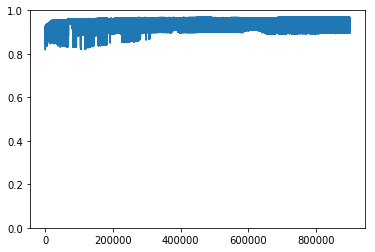

In [0]:
Perceptron.fit(x_train,y_train,900000,0.0001)

In [0]:
y_pred_train=Perceptron.predict(x_train)
print(accuracy_score(y_pred_train,y_train))

0.970703125


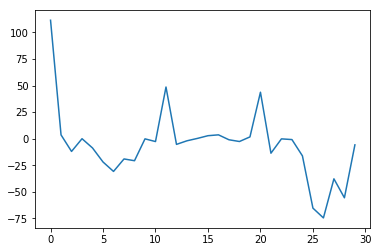

In [0]:
plt.plot(Perceptron.w)
plt.show()

In [0]:
Perceptron.b

19.74609999996732